<a href="https://colab.research.google.com/github/Gcango/Analise_Descritiva_PNAD_2015/blob/main/Analise_Descritiva_dados_PNAD_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exercicio no âmbito do curso de Data Science da ALURA
Trabalho de Análise Descritiva de um Conjunto de Dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.
O Objectivo foi responder as questões que se vão desenrolando a nível do Coolab.
A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv("/content/dados-2.csv")

In [3]:
dados.head(5)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [5]:
print(f"A base de dados da PNAD 2015 possui {dados.shape[0]} linhas e {dados.shape[1]} colunas ")

A base de dados da PNAD 2015 possui 76840 linhas e 7 colunas 


(76840, 7)

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


In [7]:
dados.describe()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
count,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000,76840.000000
mean,31.912962,0.307002,44.071421,5.032613,9.469664,2000.383199,1.699512
std,11.147830,0.461253,12.480583,2.857118,4.539929,3323.387730,0.079717
min,11.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.339245
25%,25.000000,0.000000,34.000000,2.000000,6.000000,788.000000,1.645785
50%,31.000000,0.000000,43.000000,4.000000,11.000000,1200.000000,1.699325
75%,41.000000,1.000000,53.000000,8.000000,12.000000,2000.000000,1.753062
max,53.000000,1.000000,99.000000,8.000000,17.000000,200000.000000,2.028497


In [9]:
dados.isnull().sum()

UF                0
Sexo              0
Idade             0
Cor               0
Anos de Estudo    0
Renda             0
Altura            0
dtype: int64

In [13]:
dados.columns

Index(['UF', 'Sexo', 'Idade', 'Cor', 'Anos de Estudo', 'Renda', 'Altura'], dtype='object')

##Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:
<b>A</b> ► Acima de 25 SM
<b>B</b> ► De 15 a 25 SM
<b>C</b> ► De 5 a 15 SM
<b>D</b> ► De 2 a 5 SM
<b>E</b> ► Até 2 SM
Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

In [ ]:
#1) - Define os intevalos das classes em reais (R$)

In [10]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [ ]:
#2) - Define os labels das classes

In [12]:
labels = ['E', 'D', 'C', 'B', 'A']
labels

['E', 'D', 'C', 'B', 'A']

In [ ]:
#3) - Construa a coluna de frequências

In [14]:
frequencia = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [ ]:
#4) - Construa a coluna de pecentuais

In [15]:
percentual = pd.value_counts(
  pd.cut(x = dados.Renda,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

In [ ]:
#5) - Junta as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [16]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


<Axes: >

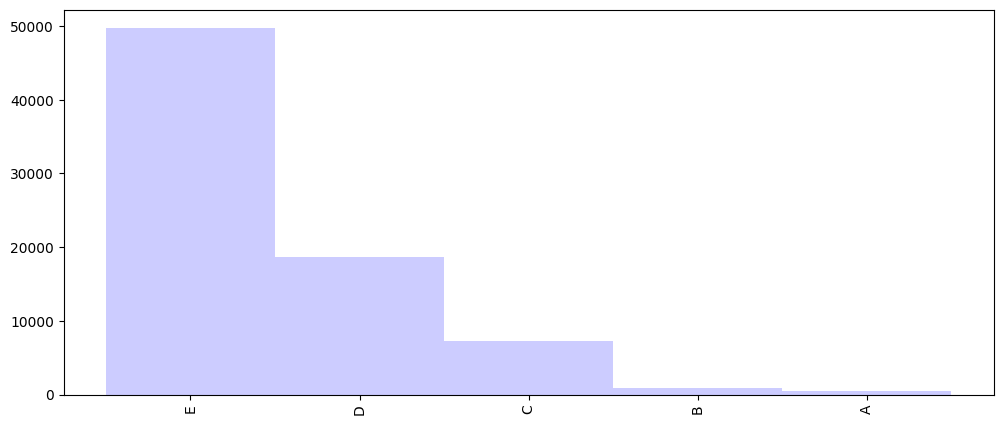

In [19]:
#)-> Insirindo Gráfico para visualizar as variaveis Frequências e Percentagem
dist_freq_renda['Frequência'].plot.bar(width = 1, color = 'blue', alpha = 0.2, figsize=(12, 5))